In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from   scipy.cluster import hierarchy


In [88]:
DirName = os.getcwd()

In [89]:
Case1 = 'IEEE118'
Case2 = 'IEEE118_mod1'

In [90]:
# Load the demand data
Demand1 = pd.read_csv(os.path.join(DirName, Case1, '2.Par', f'oT_Data_Demand_{Case1}.csv'), index_col=[0,1,2])
Demand2 = pd.read_csv(os.path.join(DirName, Case2, '2.Par', f'oT_Data_Demand_{Case2}.csv'), index_col=[0,1,2])



In [91]:
# calculate the correlation matrix for all columns
corr1 = Demand1.corr()
corr2 = Demand2.corr()

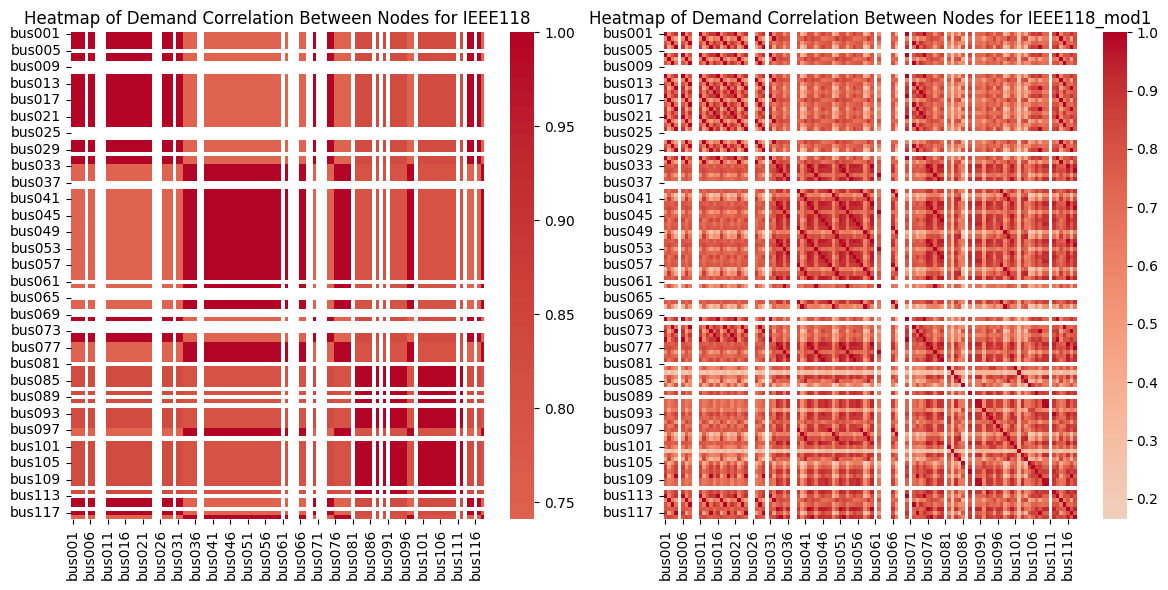

In [92]:
# Plotting the heatmap of the correlation matrix of corr1 and corr2
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot heatmap for corr1
sns.heatmap(corr1, annot=False, cmap='coolwarm', fmt=".2f", center=0, ax=axs[0])
axs[0].set_title('Heatmap of Demand Correlation Between Nodes for ' + Case1)

# Plot heatmap for corr2
sns.heatmap(corr2, annot=False, cmap='coolwarm', fmt=".2f", center=0, ax=axs[1])
axs[1].set_title('Heatmap of Demand Correlation Between Nodes for ' + Case2)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

c:\Users\Erik\miniconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
c:\Users\Erik\miniconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


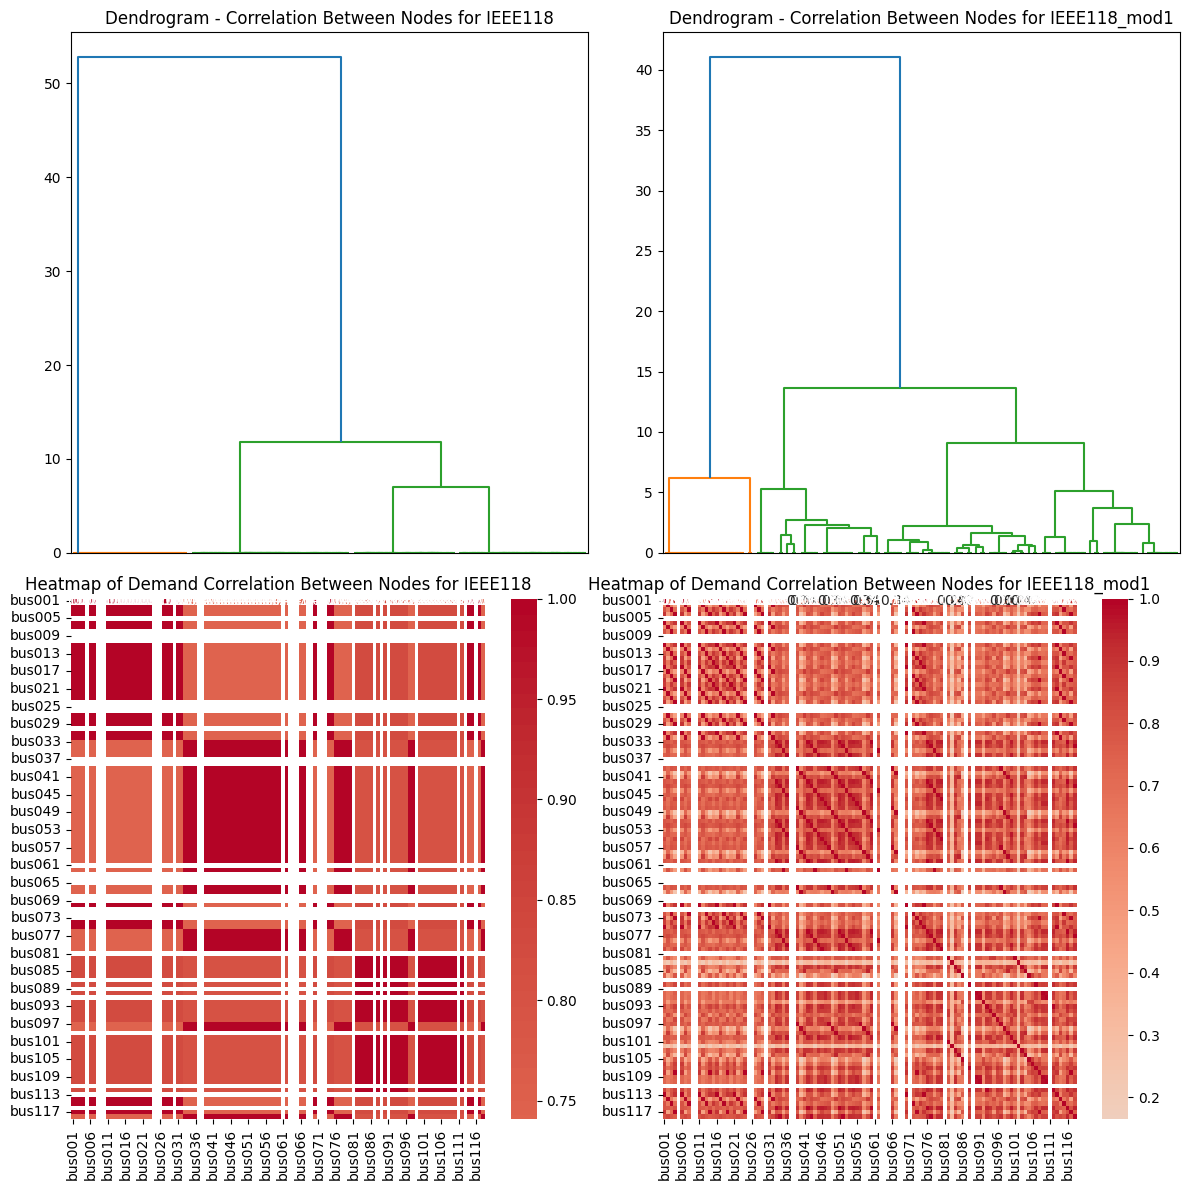

In [93]:
# Plotting the heatmap of the correlation matrix of corr1 and corr2
filled_correlation_matrix1 = corr1.fillna(0)
filled_correlation_matrix2 = corr2.fillna(0)

Z_filled1 = linkage(filled_correlation_matrix1, 'ward')
Z_filled2 = linkage(filled_correlation_matrix2, 'ward')

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot dendrogram for corr1
dendrogram_corr1 = hierarchy.dendrogram(Z_filled1, ax=axs[0, 0])
axs[0, 0].set_title('Dendrogram - Correlation Between Nodes for ' + Case1)

# Plot dendrogram for corr2
dendrogram_corr2 = hierarchy.dendrogram(Z_filled2, ax=axs[0, 1])
axs[0, 1].set_title('Dendrogram - Correlation Between Nodes for ' + Case2)

# Remove x-axis ticks and labels for dendrogram plots
axs[0, 0].set_xticks([])
axs[0, 0].set_xticklabels([])
axs[0, 1].set_xticks([])
axs[0, 1].set_xticklabels([])

# Plot heatmap for corr1
sns.heatmap(corr1, annot=True, cmap='coolwarm', fmt=".2f", center=0, ax=axs[1, 0])
axs[1, 0].set_title('Heatmap of Demand Correlation Between Nodes for ' + Case1)

# Plot heatmap for corr2
sns.heatmap(corr2, annot=True, cmap='coolwarm', fmt=".2f", center=0, ax=axs[1, 1])
axs[1, 1].set_title('Heatmap of Demand Correlation Between Nodes for ' + Case2)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [96]:
# average correlation matrix in corr1 and corr2
corr1_avg = corr1.mean()
corr2_avg = corr2.mean()
print(f'Average correlation for {Case1} is {corr1_avg.mean()}')
print(f'Average correlation for {Case2} is {corr2_avg.mean()}')

# Other statistics
corr1_std = corr1.std()
corr2_std = corr2.std()
print(f'Standard deviation of correlation for {Case1} is {corr1_std.mean()}')
print(f'Standard deviation of correlation for {Case2} is {corr2_std.mean()}')


Average correlation for IEEE118 is 0.8578583937056519
Average correlation for IEEE118_mod1 is 0.7162963333204816
Standard deviation of correlation for IEEE118 is 0.10633149614105983
Standard deviation of correlation for IEEE118_mod1 is 0.15126590862383654
